<a href="https://colab.research.google.com/github/hyeonggyeong/Project/blob/main/Customer_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from imblearn.over_sampling import SMOTE
import os

import sklearn.svm as svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/data/marketing_campaign.csv')

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# ID: 고객ID
# Year_Birth: 고객 생년월일
# Education: 고객의 교육수준
# Marital_Status: 고객의 결혼여부
# Income: 고객의 연간 가구소득
# Kidhome: 고객의 가구 내 자녀의 수
# Teenhome: 고객의 가구 내 청소년 수
# Dt_Customer: 고객이 회사에 등록한 날짜(회원가입 일자)
# Recency: 고객의 마지막 구매 후 지난 일수 
# Complain: 지난 2년동안 고객 불만 제기한 경우 1, 그렇지 않을 경우 0

# MntWines: 지난 2년 간 와인 소비량
# MntFruits: 지난 2년 간 과일 소비량
# MntMeatProducts: 지난 2년 간 육류 소비량
# MntFishProducts: 지난 2년 간 생선 소비량
# MntSweetProducts: 지난 2년 간 간식 소비량
# MntGoldProds: 지난 2년 간 금 소비량


# NumDealsPurchases: 할인제품 구매 건 수
# AcceptedCmp1: 첫 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp2: 두 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp3: 세 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp4: 네 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp5: 다섯 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# Response: 지난 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0

# NumWebPurchases: 웹사이트를 통한 구매 건 수
# NumCatalogPurchases: 카탈로그를 통한 구매 건 수
# NumStorePurchases: 매장에서 직접 구매한 건 수
# NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 수

# 1. 데이터 전처리

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data = data.dropna(axis=0)  #결측치를 포함한 행 제거

In [ ]:
data.isna().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
pd.DataFrame(data.nunique()).sort_values(0)  
# 각 컬럼이 몇개의 값을 갖고있는지 확인
# Z_Revenue 와 Z_CostContact는 하나의 값만 
# 가지고 있으므로 분석에 필요없는 컬럼. --> 삭제

,0
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


In [ ]:
data = data.drop(['Z_Revenue','Z_CostContact'],axis = 1)
data = data.drop(['Dt_Customer','ID'],axis = 1)
#위에서 말했던 'Z_Revenue','Z_CostContact' 컬럼 제거 + 고객ID 와 구매날짜는 분류분석에 필요없기 때문에 삭제

In [ ]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
#고객의 나이를 알기 위해 (현재년도 - 태어난 년도 +1)를 한 후 Age 컬럼으로 생성
data['Age'] = 2021- data.Year_Birth + 1
data = data.drop('Year_Birth',axis = 1)

In [ ]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41


In [ ]:
data['Education'].value_counts()
# Graduation = 학사
# Master = 석사
# 2n Cycle = 석사
# PhD = 박사
# Basic = 고졸
# Master 와 2n Cycle 모두 석사인데 미국과 유럽의 표기 차이이기 때문에 Master로 통합
# Graduation은 Bachelor으로 용어 변경

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
data['Education'] = data['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'])
data['Education'].value_counts()

Bachelor    1116
Master       565
PhD          481
Basic         54
Name: Education, dtype: int64

In [ ]:
data['Marital_Status'].value_counts()
# 결혼 여부도 분석용이함을 위해 기혼/미혼/이혼으로 재설정

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')
data['Marital_Status'] = data['Marital_Status'].replace('Together', 'Married')
data['Marital_Status'] = data['Marital_Status'].replace('Widow', 'Divorced')
data['Marital_Status'].value_counts()

Married     1430
Single       478
Divorced     308
Name: Marital_Status, dtype: int64

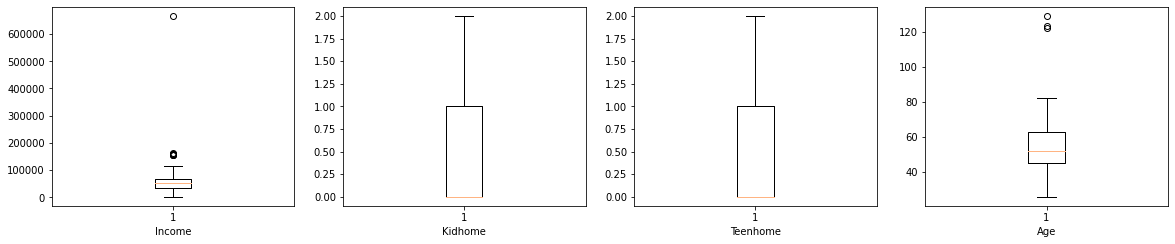

In [ ]:
# 연속형 변수들의 이상치가 있는지 확인하기 위해 Box-Plot으로 시각화
# 선호도와 같은 컬럼들은 이상치가 있어도 이해 할 수 있는 부분이기 때문에 제외 
coln = ['Income','Kidhome','Teenhome','Age']  
j=0
fig = plt.figure(figsize = (20, 30))
for i in coln:
    plt.subplot(7,4,j+1)
    plt.boxplot(data[i])
    j=j+1
    plt.xlabel(i)       
plt.show()

In [ ]:
# Income과 Age에서 이상치 발견 ㅡㅡ> 소득수준 120000 이상, 나이 100세 이상 제거
data = data.drop(data[(data['Income']>120000)|(data['Age']>100)].index)

In [ ]:
data['Income'].value_counts().sort_index(ascending = False).head()

113734.0    1
105471.0    1
102692.0    1
102160.0    1
101970.0    1
Name: Income, dtype: int64

In [ ]:
data['Age'].value_counts().sort_index(ascending = False).head()

82    1
81    1
79    6
78    7
77    8
Name: Age, dtype: int64

In [ ]:
# AcceptedCmp1: 첫 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp2: 두 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp3: 세 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp4: 네 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# AcceptedCmp5: 다섯 번째 할인 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# Response: 지난 이벤트에서 고객이 구매한 경우 1, 그렇지 않은 경우 0
# 위 컬럼들의 경우 각 이벤트(Cmp1,2,3,4,5)를 집계한 값이 Response이므로 삭제를 해준다.
data = data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis = 1)
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

# Q. 새로운 이벤트를 진행하려하는데 이벤트 내용을 구성을 어떻게 해야하나?

# 2. EDA (탐색적 데이터 분석)


- Step1. 이벤트에 참여하는 고객 성향 파악

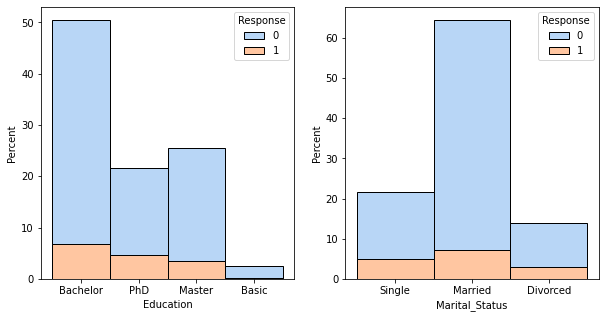

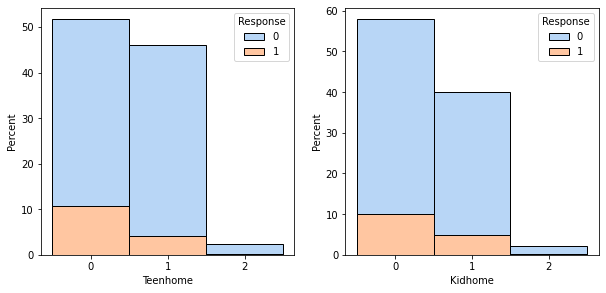

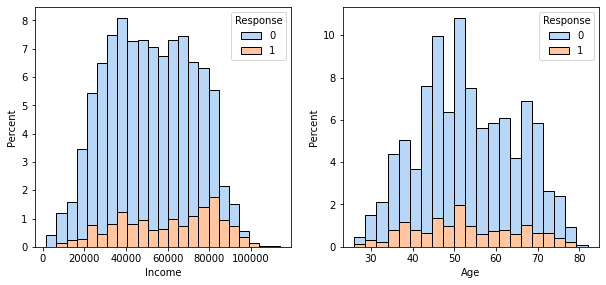

In [ ]:
sns.set_palette("pastel")

# Education & Response
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data=data, x="Education", hue="Response", multiple="stack", stat="percent")

# Marital_Status & Response
plt.subplot(122)
sns.histplot(data=data, x="Marital_Status", hue="Response", multiple="stack", stat="percent")


# Teen Home & Response
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.histplot(data=data, x="Teenhome", hue="Response", multiple="stack", stat="percent",discrete=True)
plt.xticks([0, 1, 2])


# Kid Home & Response

plt.subplot(222)
sns.histplot(data=data, x="Kidhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])


# Income & Response
plt.figure(figsize=(10.12,15))
plt.subplot(321)
sns.histplot(data=data, x="Income", hue="Response", multiple="stack", stat="percent")

# Age & Response
plt.subplot(322)
sns.histplot(data=data, x="Age", hue="Response", multiple="stack", stat="percent")
plt.show()

# 결과 
# 40~50대, 학사, 기혼, 자녀없음, 연소득 7만~9만달러의 고객들이 이벤트에 많은 참여를 한다는 것을 알 수있다.
# [40~50개, 기혼] 고객들을 대상으로 이벤트를 구성하면 될 것이다.
#(다른 변수들은 이벤트 구상 시, 고려하지 않아도 될 것이라 생각)

 - Step2. 어떤 제품 위주의 이벤트를 진행하면 좋겠는가?

In [ ]:
#기혼의 40~50대 목표로 이벤트
#그러면 40~50대에서 자주사는 물품있음?

In [ ]:
# 40~50대 기혼이 아닌 데이터는 삭제하여 data1으로 생성
data1 = data.drop(data[(data['Marital_Status']!='Married')|(data['Age']<40)|(data['Age']>50)].index)

In [ ]:
data1['Marital_Status'].value_counts()

Married    476
Name: Marital_Status, dtype: int64

In [ ]:
data1['Age'].value_counts()

46    59
50    56
44    54
47    52
48    51
49    47
45    36
43    34
40    33
42    27
41    27
Name: Age, dtype: int64

In [ ]:
# 40~50대 기혼 고객들은 와인> 고기> 생선> 간식 > 과일 순으로 많이 구매
sales = data1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']].sum()
sales.sort_values(ascending = False)

MntWines            121346
MntMeatProducts      66874
MntFishProducts      16793
MntSweetProducts     12451
MntFruits            10716
dtype: int64

Text(0, 0.5, 'Sales')

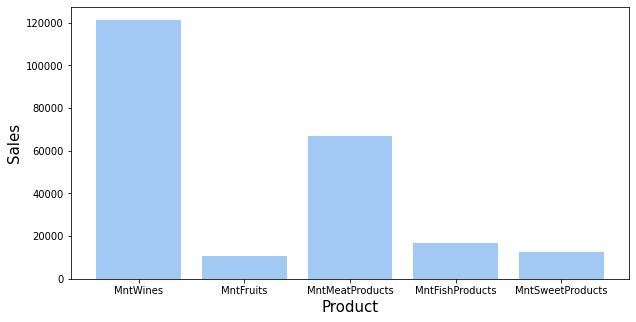

In [ ]:
plt.figure(figsize=(10,5))
x = sales.index
y = sales.values
plt.bar(x,y)
plt.xlabel('Product', fontsize=15)
plt.ylabel('Sales', fontsize=15)


In [ ]:
# 혹시 이 제품들간의 상관관계가 있는가? 있으면 번들로 이벤트 구성

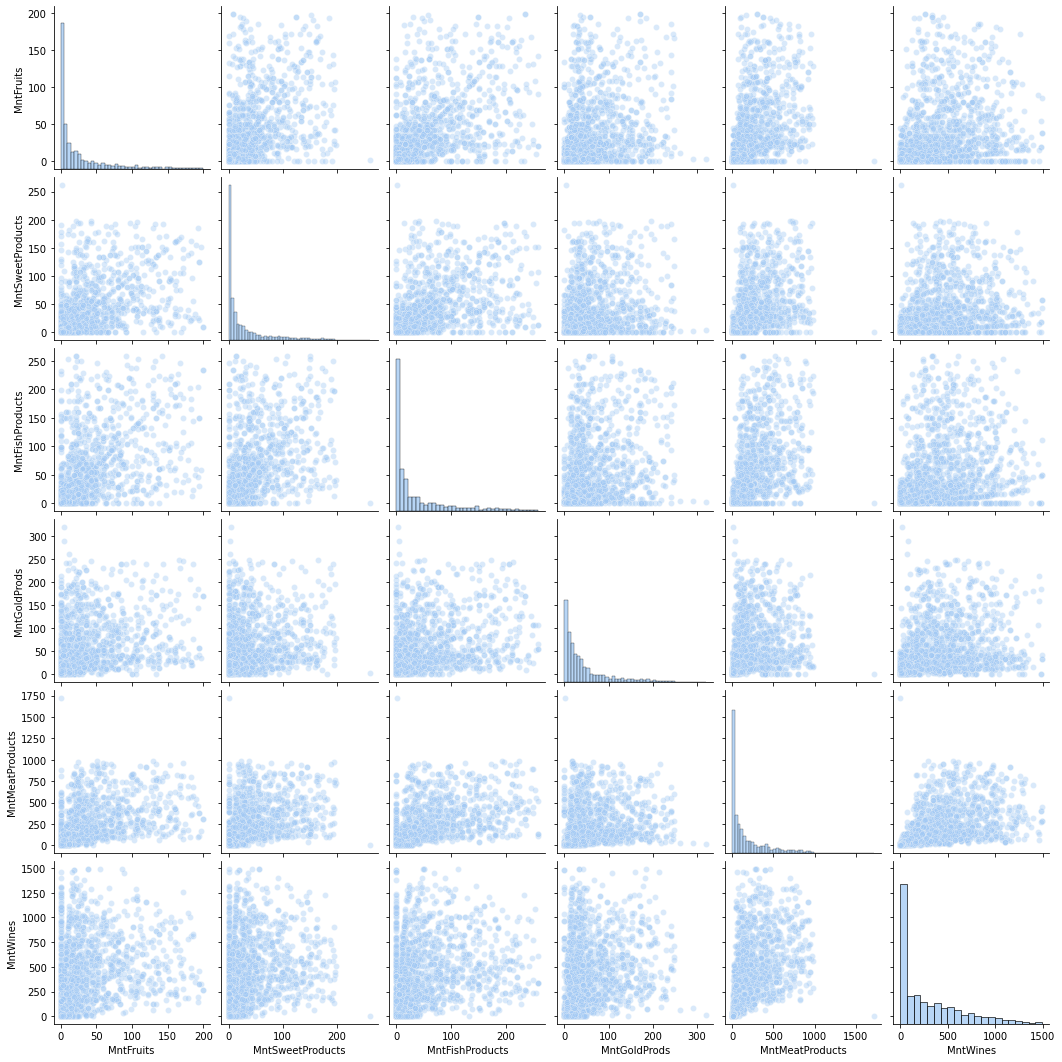

In [ ]:
NUMERICAL_FEATURES = ['MntFruits','MntSweetProducts', 'MntFishProducts', 'MntGoldProds','MntMeatProducts', 'MntWines']

sns.pairplot(data=data[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.4})
plt.show()

# 산점도 확인 결과 : 제품들 간의 상관관계는 없는 것으로 보인다. 
# 따라서 제품 간 Bundle 이벤트를 진행해도 효과는 없을 것

# 예측모델

In [ ]:
# 예측 모델 개발에 앞서 명목형 데이터를 수치형으로 변경.
data.info()  # 데이터 타입이 object인 컬럼 2개 (Education, Marital_Status )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

In [ ]:
# 교육수준의 경우 레벨에 따라 0,1,2,3으로 변경
data['Education'] = data['Education'].replace(['Basic'],0)
data['Education'] = data['Education'].replace(['Bachelor'],1)
data['Education'] = data['Education'].replace(['Master'],2)
data['Education'] = data['Education'].replace(['PhD'],3)
data['Education'].value_counts()

1    1113
2     562
3     476
0      54
Name: Education, dtype: int64

In [ ]:
# 결혼여부는 pandas의 get_dummies()를 이용해 간단하게 원-핫 인코딩 진행.
data = pd.get_dummies(data)
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65,0,0,1
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68,0,0,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57,0,1,0
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38,0,1,0
4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2205 non-null   int64  
 1   Income                   2205 non-null   float64
 2   Kidhome                  2205 non-null   int64  
 3   Teenhome                 2205 non-null   int64  
 4   Recency                  2205 non-null   int64  
 5   MntWines                 2205 non-null   int64  
 6   MntFruits                2205 non-null   int64  
 7   MntMeatProducts          2205 non-null   int64  
 8   MntFishProducts          2205 non-null   int64  
 9   MntSweetProducts         2205 non-null   int64  
 10  MntGoldProds             2205 non-null   int64  
 11  NumDealsPurchases        2205 non-null   int64  
 12  NumWebPurchases          2205 non-null   int64  
 13  NumCatalogPurchases      2205 non-null   int64  
 14  NumStorePurchases       

In [ ]:
# 각 변수에 대한 Response를 예측 하는 모델이기에 종속변수를 Response로 설정하여 y 데이터로 저장 
x_data = data.drop('Response',axis = 1)
y_data = data['Response']

# 데이터셋 전부를 학습 시키면 분류예측모델의 정확도를 판단 할 수 없기에 
# 데이터셋을 학습:검증(7:3) 데이터로 나누는 과정

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)
x_train, y_train =SMOTE(random_state=2).fit_resample(x_train, y_train.ravel())

In [ ]:
print('x_train : ',len(x_train))
print('y_train : ',len(y_train))
print('x_test : ',len(x_test))
print('y_test : ',len(y_test))

x_train :  2620
y_train :  2620
x_test :  662
y_test :  662


In [ ]:
#예측모델 평가 (SVM vs RandomForest)

#SVM(기본)
model_svm = svm.SVC().fit(x_train, y_train)
predict_svm = model_svm.predict(x_test)
print('SVM :',accuracy_score(y_test,predict_svm))

#RandomForest(기본)
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
predict_rf = model_rf.predict(x_test)
print('RandomForest :',accuracy_score(y_test,predict_rf))

SVM : 0.7492447129909365
RandomForest : 0.8685800604229608


In [ ]:
# 데이터 스케일링 진행(StandardScaler사용)
scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)
x_train, y_train =SMOTE(random_state=2).fit_resample(x_train, y_train.ravel())

In [ ]:
#SVM(스케일링)
model_svm = svm.SVC().fit(x_train, y_train)
predict_svm = model_svm.predict(x_test)
print('SVM :',round(accuracy_score(y_test,predict_svm),3))

#RandomForest(스케일링)
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
predict_rf = model_rf.predict(x_test)
print('RandomForest :',round(accuracy_score(y_test,predict_rf),3))

SVM : 0.811
RandomForest : 0.878


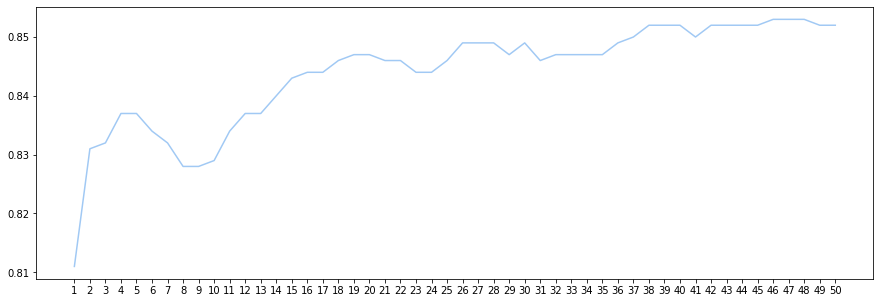

In [ ]:
#하이퍼 파라미터 수정(SVM - C)
# 가장 높게 나온 C=48으로 선정
score_list = []
x_list = []
for i in range(1,51) :
  model_svm = svm.SVC(C=i).fit(x_train, y_train)
  predict_svm = model_svm.predict(x_test)
  score_list.append(round(accuracy_score(y_test,predict_svm),3))
  x_list.append(i)

plt.subplots(figsize=(15, 5))
plt.plot(x_list, score_list)
plt.xticks(x_list)	
plt.show() 

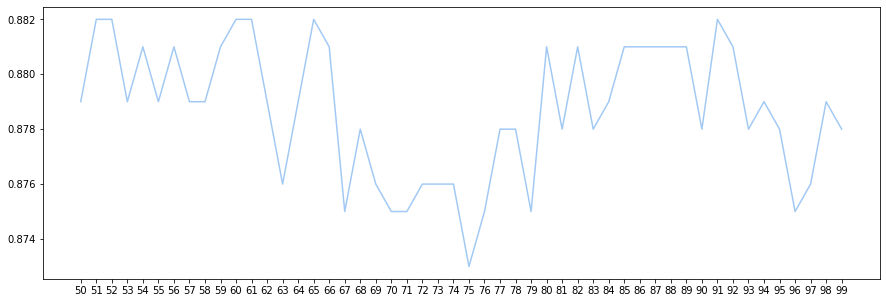

In [ ]:
#RandomForest(생성할 Tree갯수)
# tree  = 59개 일 때 최대수치
score_list = []
x_list = []
for i in range(50,100) :
  model_rf = RandomForestClassifier(n_estimators=i, max_depth=100,random_state=0)
  model_rf.fit(x_train,y_train)
  predict_rf = model_rf.predict(x_test)
  score_list.append(round(accuracy_score(y_test,predict_rf),3))
  x_list.append(i)

plt.subplots(figsize=(15, 5))
plt.plot(x_list, score_list)
plt.xticks(x_list)	
plt.show() 


In [ ]:
#예측 모델 비교

#SVM
model_svm = svm.SVC(C=48).fit(x_train, y_train)
predict_svm = model_svm.predict(x_test)
print('SVM :',round(accuracy_score(y_test,predict_svm),3))


#RandomForest
model_rf = RandomForestClassifier(n_estimators=59, max_depth=100,random_state=0)
model_rf.fit(x_train,y_train)
predict_rf = model_rf.predict(x_test)
print('RandomForest :',round(accuracy_score(y_test,predict_rf),3))

SVM : 0.853
RandomForest : 0.881


두 개의 예측모델 중 RandomForest로 결정